In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!unzip /content/gdrive/MyDrive/archive.zip

unzip:  cannot find or open /content/gdrive/MyDrive/archive.zip, /content/gdrive/MyDrive/archive.zip.zip or /content/gdrive/MyDrive/archive.zip.ZIP.


In [ ]:
import pandas as pd

import os
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dense
from tensorflow.keras.losses import SparseCategoricalCrossentropy

from sklearn.metrics import accuracy_score, confusion_matrix, classification_report


import keras
from keras.preprocessing.image import ImageDataGenerator, img_to_array, load_img
from keras.applications.vgg19 import VGG19, preprocess_input, decode_predictions


In [ ]:
train_dataset= ImageDataGenerator(zoom_range=0.5, shear_range=0.3, horizontal_flip=True, preprocessing_function=preprocess_input )
valid_dataset= ImageDataGenerator(preprocessing_function=preprocess_input )

In [ ]:
train =train_dataset.flow_from_directory(directory= "/content/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/train", target_size=(256,256), batch_size=32)
valid =valid_dataset.flow_from_directory(directory= "/content/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/valid", target_size=(256,256), batch_size=32)

Found 70295 images belonging to 38 classes.
Found 17572 images belonging to 38 classes.


In [ ]:
train.head(5)

NameError: ignored

In [ ]:
t_image, label= train.next()

In [ ]:
def plotImage(img_arr, label):
    for im , l in zip(img_arr, label):
      plt.figure(figsize=(5,5))
      plt.imshow(im)
      plt.show()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


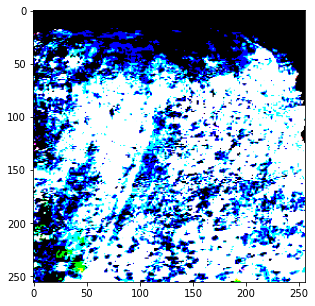

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


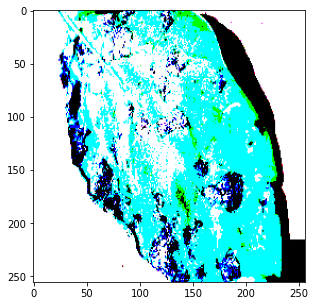

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


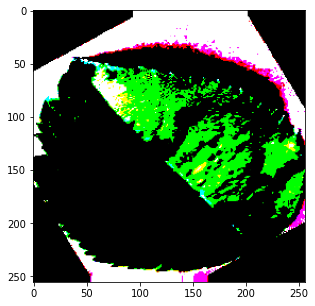

In [ ]:
plotImage(t_image[:3], label[:3])

In [ ]:
from keras.layers import Dense,Flatten
from keras.models import Model
from keras.applications.vgg19 import VGG19
import keras

In [ ]:
base_model= VGG19(input_shape=(256,256,3), include_top=False)

80150528/80134624 [==============================] - 1s 0us/step


In [ ]:
for layer in base_model.layers:
  layer.trainable=False

In [ ]:
base_model.summary()

Model: "vgg19"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 256, 256, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 256, 256, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 256, 256, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 128, 128, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 128, 128, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 128, 128, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 64, 64, 128)       0     

In [ ]:
X= Flatten()(base_model.output)
X= Dense(units=38, activation='softmax')(X)

#Creating the model
model=Model(base_model.input, X)

In [ ]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 256, 256, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 256, 256, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 256, 256, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 128, 128, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 128, 128, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 128, 128, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 64, 64, 128)       0     

In [ ]:
model.compile(optimizer='adam', loss=keras.losses.categorical_crossentropy, metrics=['accuracy'])

In [ ]:
from keras.callbacks import ModelCheckpoint, EarlyStopping

#early stopping
es= EarlyStopping(monitor= 'val_accuracy', min_delta=0.01, patience=3,verbose=1)

#model checkpoint
mc= ModelCheckpoint(filepath="best_model.h5",monitor= 'val_accuracy', min_delta=0.01, patience=3, verbose=1, save_best_only=True)
cb=[es,mc]



In [ ]:
his= model.fit_generator(train, steps_per_epoch=16, epochs=50, verbose=1, callbacks=cb, validation_data=valid, validation_steps=16)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  """Entry point for launching an IPython kernel.


Epoch 1/50
16/16 [==============================] - ETA: 0s - loss: 6.5065 - accuracy: 0.7617
Epoch 1: val_accuracy improved from -inf to 0.80469, saving model to best_model.h5
16/16 [==============================] - 19s 1s/step - loss: 6.5065 - accuracy: 0.7617 - val_loss: 5.8475 - val_accuracy: 0.8047
Epoch 2/50
16/16 [==============================] - ETA: 0s - loss: 7.3391 - accuracy: 0.7344
Epoch 2: val_accuracy improved from 0.80469 to 0.83984, saving model to best_model.h5
16/16 [==============================] - 18s 1s/step - loss: 7.3391 - accuracy: 0.7344 - val_loss: 5.5918 - val_accuracy: 0.8398
Epoch 3/50
16/16 [==============================] - ETA: 0s - loss: 8.1073 - accuracy: 0.7480
Epoch 3: val_accuracy did not improve from 0.83984
16/16 [==============================] - 18s 1s/step - loss: 8.1073 - accuracy: 0.7480 - val_loss: 4.5781 - val_accuracy: 0.8320
Epoch 4/50
16/16 [==============================] - ETA: 0s - loss: 7.4534 - accuracy: 0.7598
Epoch 4: val_accu

In [ ]:
h= his.history
h.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

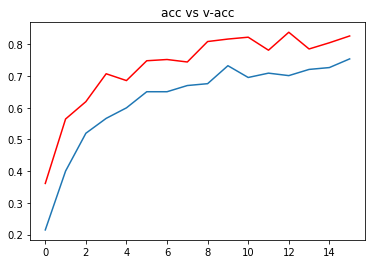

In [ ]:
plt.plot(h['accuracy'])
plt.plot(h['val_accuracy'], c= "red")
plt.title("acc vs v-acc")
plt.show()

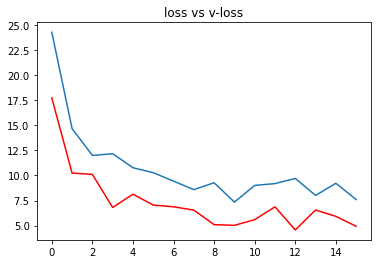

In [ ]:
plt.plot(h['loss'])
plt.plot(h['val_loss'], c="red")
plt.title("loss vs v-loss")
plt.show()

In [ ]:
#load best model
from keras.models import load_model
model=load_model("/content/model.h5")

In [ ]:
acc= model.evaluate(valid)[1]
print(f"The accuracy of the model is = {acc*100} %")

550/550 [==============================] - 222s 404ms/step - loss: 4.7039 - accuracy: 0.8326
The accuracy of the model is = 83.26314687728882 %


In [ ]:
TF_LITE_MODEL_FILE_NAME = "tf_lite_model.tflite"

In [ ]:
tf_lite_converter = tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model = tf_lite_converter.convert()

INFO:tensorflow:Assets written to: /tmp/tmpg28n87jk/assets


In [ ]:
tflite_model_name = TF_LITE_MODEL_FILE_NAME
open(tflite_model_name, "wb").write(tflite_model)

85087664

In [ ]:
def convert_bytes(size, unit=None):
    if unit == "KB":
        return print('File size: ' + str(round(size / 1024, 3)) + ' Kilobytes')
    elif unit == "MB":
        return print('File size: ' + str(round(size / (1024 * 1024), 3)) + ' Megabytes')
    else:
        return print('File size: ' + str(size) + ' bytes')

In [ ]:
def get_file_size(file_path):
    size = os.path.getsize(file_path)
    return size

In [ ]:
convert_bytes(get_file_size('/content/best_model.h5'), "MB")

File size: 90.724 Megabytes


In [ ]:
interpreter = tf.lite.Interpreter(model_path = TF_LITE_MODEL_FILE_NAME)
input_details = interpreter.get_input_details()
output_details = interpreter.get_output_details()
print("Input Shape:", input_details[0]['shape'])
print("Input Type:", input_details[0]['dtype'])
print("Output Shape:", output_details[0]['shape'])
print("Output Type:", output_details[0]['dtype'])

Input Shape: [  1 256 256   3]
Input Type: <class 'numpy.float32'>
Output Shape: [ 1 38]
Output Type: <class 'numpy.float32'>
